[View in Colaboratory](https://colab.research.google.com/github/Scottdyt/ClassProject/blob/master/naive%20CNN.ipynb)

# CIFAR - 10(PART.2)
1015303105 杜云滔
# naive CNN

# using Google GPU

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpp7bcxtga/pubring.gpg' created
gpg: /tmp/tmpp7bcxtga/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [7]:
import os
path = "/content/drive/cifar10"
os.chdir(path)

# Imports packages and functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

C:\Users\scott\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
matplotlib.style.use('ggplot')

In [3]:
from functions import get_class_names, get_train_data, get_test_data, plot_images, plot_model,error_plot,predict_classes

# Get data

## Class names and constant

In [4]:
class_names = get_class_names()
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
# Hight and width of the images
IMAGE_SIZE = 32
# 3 channels, Red, Green and Blue
CHANNELS = 3

## Get number of classes

In [6]:
num_classes = len(class_names)
print(num_classes)

10


### Load the training dataset ``train_class`` is one hot vector

In [7]:
train_images, train_labels, train_class = get_train_data()

inspect labels

In [8]:
print(train_labels)

[6 9 9 ... 9 1 1]


inspect one hot label

In [9]:
print(train_class)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### Load the test data

In [10]:
test_images, test_labels, test_class = get_test_data()

In [11]:
print("Training dataset size: ",len(train_images))
print("Testing dataset size: ",len(test_images))

Training dataset size:  50000
Testing dataset size:  10000


successful load data and labels！

# naive CNN model

contain 4 Convolutional Neural Network and 2 Dense, using Dropout and MaxPooling2D

In [19]:
def build_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

In [20]:
model = build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

## Train model 

### using checkPoint to save the model after every epoch

In [21]:
checkpoint = ModelCheckpoint('model/naive_CNN.h5',  monitor='val_loss', verbose=0, save_best_only= True, mode='auto') 

``categorical_crossentropy`` loss function is often used in multi-classification

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy']) 

### train data

In [23]:
model_info = model.fit(train_images, train_class,batch_size = 128, epochs = 100, validation_data= (test_images, test_class),callbacks=[checkpoint],verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 28s 568us/step - loss: 1.6122 - acc: 0.4088 - val_loss: 1.2681 - val_acc: 0.5482
Epoch 2/100
23552/50000 [=============>................] - ETA: 12s - loss: 1.2857 - acc: 0.537850000/50000 [==============================] - 25s 491us/step - loss: 1.2248 - acc: 0.5605 - val_loss: 1.0816 - val_acc: 0.6130
Epoch 3/100
50000/50000 [==============================] - 22s 435us/step - loss: 1.0519 - acc: 0.6268 - val_loss: 0.9198 - val_acc: 0.6783
Epoch 4/100
 3328/50000 [>.............................] - ETA: 18s - loss: 0.9649 - acc: 0.661150000/50000 [==============================] - 24s 488us/step - loss: 0.9301 - acc: 0.6733 - val_loss: 0.8259 - val_acc: 0.7102
Epoch 5/100
46720/50000 [===========================>..] - ETA: 1s - loss: 0.8533 - acc: 0.698950000/50000 [==============================] - 24s 488us/step - loss: 0.8513 - acc: 0.6996 - val_loss: 0.7601 - val_acc: 0.7324

 5376/50000 [==>...........................] - ETA: 21s - loss: 0.2831 - acc: 0.901450000/50000 [==============================] - 25s 491us/step - loss: 0.2936 - acc: 0.8956 - val_loss: 0.6266 - val_acc: 0.8066
Epoch 45/100
43392/50000 [=========================>....] - ETA: 3s - loss: 0.2816 - acc: 0.900950000/50000 [==============================] - 25s 494us/step - loss: 0.2839 - acc: 0.8999 - val_loss: 0.6619 - val_acc: 0.8023
Epoch 46/100
50000/50000 [==============================] - 25s 492us/step - loss: 0.2840 - acc: 0.8989 - val_loss: 0.6609 - val_acc: 0.7981
Epoch 47/100
 5632/50000 [==>...........................] - ETA: 20s - loss: 0.2633 - acc: 0.908250000/50000 [==============================] - 25s 495us/step - loss: 0.2828 - acc: 0.8987 - val_loss: 0.6419 - val_acc: 0.8031
Epoch 48/100
45568/50000 [==========================>...] - ETA: 2s - loss: 0.2737 - acc: 0.901750000/50000 [==============================] - 25s 492us/step - loss: 0.2748 - acc: 0.9013 - val_loss:

43904/50000 [=========================>....] - ETA: 2s - loss: 0.2162 - acc: 0.923850000/50000 [==============================] - 25s 490us/step - loss: 0.2157 - acc: 0.9238 - val_loss: 0.6914 - val_acc: 0.8099
Epoch 87/100
50000/50000 [==============================] - 25s 499us/step - loss: 0.2118 - acc: 0.9258 - val_loss: 0.6808 - val_acc: 0.8052
Epoch 88/100
 4992/50000 [=>............................] - ETA: 20s - loss: 0.2131 - acc: 0.925350000/50000 [==============================] - 24s 487us/step - loss: 0.2146 - acc: 0.9253 - val_loss: 0.6826 - val_acc: 0.8086
Epoch 89/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.2194 - acc: 0.923450000/50000 [==============================] - 25s 492us/step - loss: 0.2177 - acc: 0.9237 - val_loss: 0.6773 - val_acc: 0.8074
Epoch 90/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.2082 - acc: 0.9275 - val_loss: 0.7052 - val_acc: 0.8090
Epoch 91/100
 6016/50000 [==>...........................] 

## Evaluate the model

In [24]:
scores = model.evaluate(test_images, test_class, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.57%


the naive CNN get 80.57% accuracy in test data,not bad

## Plot model accuracy and loss 

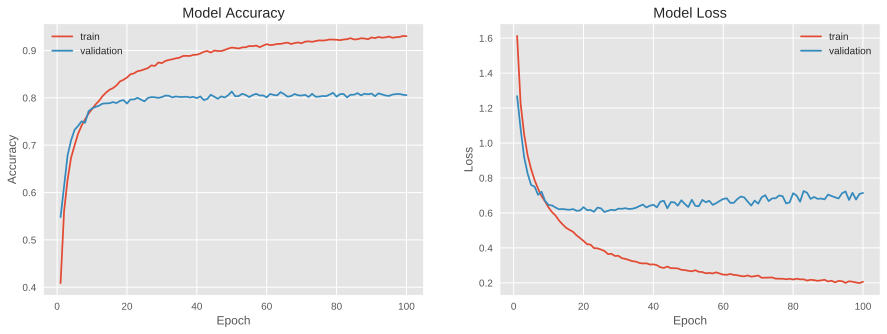

In [25]:
plot_model(model_info)

We can see from plot, the loss of train data is decreasing constantly, but test data is not. A little bit overfit.

# Prediction

## Get Prediction vector from model

In [13]:
class_predict = model.predict(test_images, batch_size=32)
print(class_predict[0])

[5.2283116e-07 7.0990022e-06 2.5755906e-05 7.2193044e-01 2.5330250e-05
 2.7621359e-01 9.1088389e-04 7.9541271e-05 8.0186990e-04 5.1136290e-06]


## Get labels and prepare for plot

In [14]:
correct, predict_labels = predict_classes(model,test_images,test_labels)

In [15]:
print(correct)

[ True  True  True ...  True  True  True]


In [16]:
print(predict_labels)

[3 8 8 ... 5 1 7]


## show classifications result

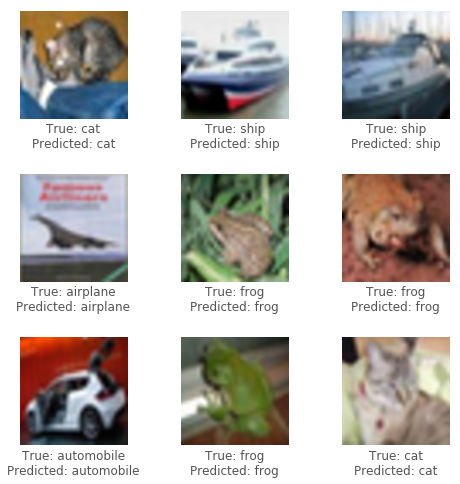

In [18]:
plot_images(images=test_images[0:9],
            true_labels=test_labels[0:9],
            class_names=class_names,
            labels_predict=predict_labels[0:9])

## show  wrong classifications

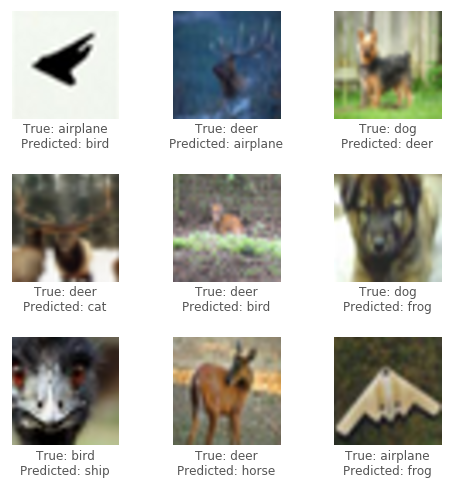

In [20]:
error_plot(test_images,test_labels,class_names,predict_labels,correct)